In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer


In [3]:
import lightgbm as lgb
import xgboost as xgb


In [4]:
train=pd.read_csv("Titanic_train.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test=pd.read_csv("Titanic_test.csv")
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
train.shape

(891, 12)

In [7]:
test.shape

(418, 11)

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [10]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [11]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [13]:
train.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Dooley, Mr. Patrick",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


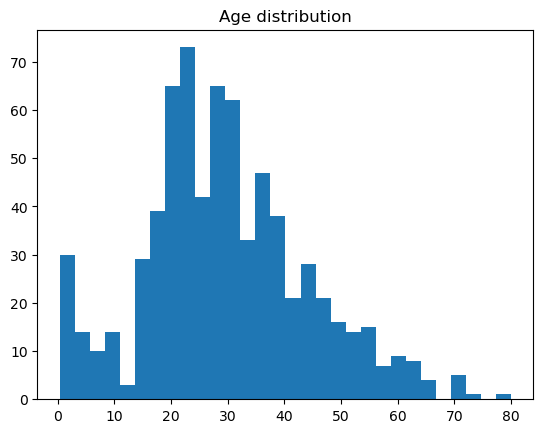

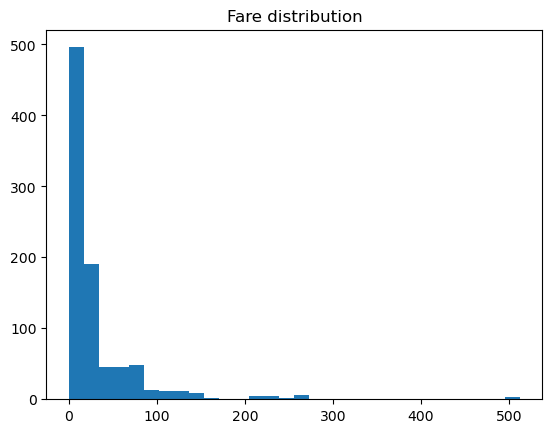

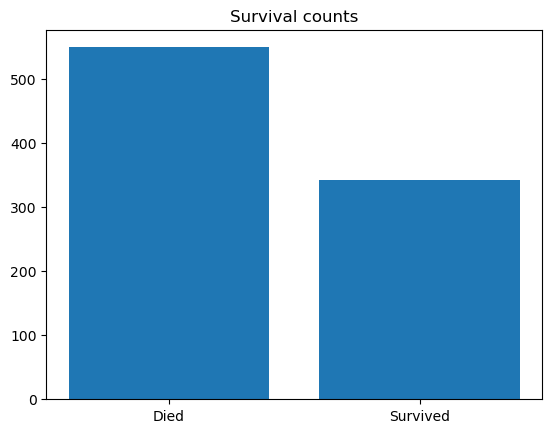

In [14]:
# Histograms and bar plots (matplotlib)
plt.hist(train['Age'].dropna(), bins=30); plt.title("Age distribution"); plt.show()
plt.hist(train['Fare'].dropna(), bins=30); plt.title("Fare distribution"); plt.show()
vals = train['Survived'].value_counts().sort_index()
plt.bar(['Died','Survived'], vals); plt.title("Survival counts"); plt.show()

In [15]:
# --- Preprocessing & Feature Engineering ---
train['is_train'] = 1
test['is_train'] = 0
test['Survived'] = np.nan  # placeholder

combo = pd.concat([train, test], sort=False).reset_index(drop=True)

In [22]:
# One-hot encode Embarked, Title, Pclass
combo = pd.get_dummies(combo, columns=['Embarked','Title','Pclass'], drop_first=True)

In [29]:
# --- Feature Engineering ---
train['Title'] = train['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
rare_titles = train['Title'].value_counts()[train['Title'].value_counts() < 10].index
train['Title'] = train['Title'].replace(rare_titles, 'Rare')
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1
train['IsAlone'] = (train['FamilySize'] == 1).astype(int)

In [30]:
# Handle missing values
train['Age'] = train.groupby('Title')['Age'].transform(lambda x: x.fillna(x.median()))
train['Embarked'] = train['Embarked'].fillna(train['Embarked'].mode()[0])
train['Fare'] = train['Fare'].fillna(train['Fare'].median())

In [32]:
 #Encode categorical variables
train['Sex'] = train['Sex'].map({'male': 0, 'female': 1})
train = pd.get_dummies(train, columns=['Embarked', 'Title', 'Pclass'], drop_first=True)

In [33]:
# Drop unnecessary columns
train = train.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)


In [34]:
# Separate features and target
X = train.drop('Survived', axis=1)
y = train['Survived']


In [35]:
# Normalize numeric columns
scaler = StandardScaler()
X[['Age', 'Fare']] = scaler.fit_transform(X[['Age', 'Fare']])

##### Split the Data into Training & Testing Sets

In [36]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (712, 16)
Test shape: (179, 16)


##### Define Evaluation Function

In [37]:
def evaluate_model(model, X_t, y_t, model_name="Model"):
    preds = model.predict(X_t)
    probs = model.predict_proba(X_t)[:, 1]

    acc = accuracy_score(y_t, preds)
    prec = precision_score(y_t, preds)
    rec = recall_score(y_t, preds)
    f1 = f1_score(y_t, preds)
    roc = roc_auc_score(y_t, probs)

    print(f"\n--- {model_name} Evaluation ---")
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"ROC AUC: {roc:.4f}")
    print("Confusion Matrix:\n", confusion_matrix(y_t, preds))
    print("Classification Report:\n", classification_report(y_t, preds))

    return {'Accuracy': acc, 'Precision': prec, 'Recall': rec, 'F1': f1, 'ROC_AUC': roc}


##### Build and Train LightGBM Model

In [38]:
# LightGBM model
lgb_model = lgb.LGBMClassifier(
    n_estimators=200,
    learning_rate=0.05,
    num_leaves=31,
    random_state=42
)

lgb_model.fit(X_train, y_train)

# Evaluate on test set
lgb_results = evaluate_model(lgb_model, X_test, y_test, "LightGBM")


[LightGBM] [Info] Number of positive: 273, number of negative: 439
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001210 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 228
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383427 -> initscore=-0.475028
[LightGBM] [Info] Start training from score -0.475028
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

##### Build and Train XGBoost Model

In [39]:
# XGBoost model
xgb_model = xgb.XGBClassifier(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    eval_metric='logloss',
    use_label_encoder=False
)

xgb_model.fit(X_train, y_train)

# Evaluate
xgb_results = evaluate_model(xgb_model, X_test, y_test, "XGBoost")


C:\Users\nikhi\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:35:43] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



--- XGBoost Evaluation ---
Accuracy: 0.8156
Precision: 0.8000
Recall: 0.6957
F1 Score: 0.7442
ROC AUC: 0.8503
Confusion Matrix:
 [[98 12]
 [21 48]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.89      0.86       110
           1       0.80      0.70      0.74        69

    accuracy                           0.82       179
   macro avg       0.81      0.79      0.80       179
weighted avg       0.81      0.82      0.81       179



##### Cross-Validation for Both Models

In [41]:
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# LightGBM CV
lgb_cv_score = cross_val_score(lgb_model, X, y, cv=cv, scoring='accuracy')
xgb_cv_score = cross_val_score(xgb_model, X, y, cv=cv, scoring='accuracy')

print("\nLightGBM CV Accuracy:", lgb_cv_score.mean().round(4))
print("XGBoost CV Accuracy:", xgb_cv_score.mean().round(4))


[LightGBM] [Info] Number of positive: 273, number of negative: 439
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000198 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 218
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383427 -> initscore=-0.475028
[LightGBM] [Info] Start training from score -0.475028
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

C:\Users\nikhi\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:37:39] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\nikhi\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:37:40] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\nikhi\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:37:40] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\nikhi\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:37:40] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtr


LightGBM CV Accuracy: 0.8305
XGBoost CV Accuracy: 0.8518


##### Hyperparameter Tuning

In [42]:
# --- LightGBM tuning ---
lgb_param_grid = {
    'num_leaves': [15, 31, 63],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, -1]
}

lgb_search = RandomizedSearchCV(
    estimator=lgb.LGBMClassifier(random_state=42),
    param_distributions=lgb_param_grid,
    n_iter=10,
    scoring='roc_auc',
    cv=cv,
    n_jobs=-1,
    random_state=42
)
lgb_search.fit(X_train, y_train)

print("Best LightGBM params:", lgb_search.best_params_)

[LightGBM] [Info] Number of positive: 273, number of negative: 439
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000130 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 228
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383427 -> initscore=-0.475028
[LightGBM] [Info] Start training from score -0.475028
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

In [43]:
# --- XGBoost tuning ---
xgb_param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 300],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0]
}

xgb_search = RandomizedSearchCV(
    estimator=xgb.XGBClassifier(random_state=42, eval_metric='logloss', use_label_encoder=False),
    param_distributions=xgb_param_grid,
    n_iter=10,
    scoring='roc_auc',
    cv=cv,
    n_jobs=-1,
    random_state=42
)
xgb_search.fit(X_train, y_train)

print("Best XGBoost params:", xgb_search.best_params_)

C:\Users\nikhi\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:40:22] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best XGBoost params: {'subsample': 0.8, 'n_estimators': 300, 'max_depth': 4, 'learning_rate': 0.1, 'colsample_bytree': 1.0}


##### Compare Models

In [44]:
results_df = pd.DataFrame({
    'Model': ['LightGBM', 'XGBoost'],
    'Accuracy': [lgb_results['Accuracy'], xgb_results['Accuracy']],
    'Precision': [lgb_results['Precision'], xgb_results['Precision']],
    'Recall': [lgb_results['Recall'], xgb_results['Recall']],
    'F1 Score': [lgb_results['F1'], xgb_results['F1']],
    'ROC AUC': [lgb_results['ROC_AUC'], xgb_results['ROC_AUC']]
})
print("\nModel Comparison:\n")
print(results_df)



Model Comparison:

      Model  Accuracy  Precision    Recall  F1 Score   ROC AUC
0  LightGBM  0.815642   0.757143  0.768116  0.762590  0.827866
1   XGBoost  0.815642   0.800000  0.695652  0.744186  0.850329


##### Evaluate & Compare Performance:



In [45]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# --- Evaluate LightGBM ---
lgb_preds = lgb_model.predict(X_test)
lgb_probs = lgb_model.predict_proba(X_test)[:, 1]

lgb_acc = accuracy_score(y_test, lgb_preds)
lgb_prec = precision_score(y_test, lgb_preds)
lgb_rec = recall_score(y_test, lgb_preds)
lgb_f1 = f1_score(y_test, lgb_preds)
lgb_auc = roc_auc_score(y_test, lgb_probs)

In [46]:
# --- Evaluate XGBoost ---
xgb_preds = xgb_model.predict(X_test)
xgb_probs = xgb_model.predict_proba(X_test)[:, 1]

xgb_acc = accuracy_score(y_test, xgb_preds)
xgb_prec = precision_score(y_test, xgb_preds)
xgb_rec = recall_score(y_test, xgb_preds)
xgb_f1 = f1_score(y_test, xgb_preds)
xgb_auc = roc_auc_score(y_test, xgb_probs)

In [47]:
# --- Combine results into a DataFrame ---
results_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC'],
    'LightGBM': [lgb_acc, lgb_prec, lgb_rec, lgb_f1, lgb_auc],
    'XGBoost': [xgb_acc, xgb_prec, xgb_rec, xgb_f1, xgb_auc]
})

results_df.set_index('Metric', inplace=True)
print("Performance Comparison:\n")
display(results_df)

Performance Comparison:



,LightGBM,XGBoost
Metric,,
Accuracy,0.815642,0.815642
Precision,0.757143,0.800000
Recall,0.768116,0.695652
F1-Score,0.762590,0.744186
ROC-AUC,0.827866,0.850329


##### Visualization of Performance Metrics

<Figure size 800x500 with 0 Axes>

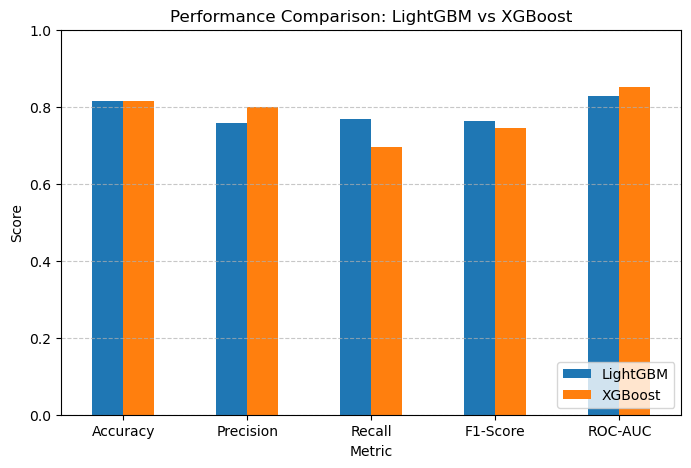

In [48]:
# --- Bar plot for comparison ---
plt.figure(figsize=(8,5))
results_df.plot(kind='bar', figsize=(8,5))
plt.title("Performance Comparison: LightGBM vs XGBoost")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.legend(loc='lower right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [49]:
print("""Interpretation Tip:\n

Taller bars indicate better performance for that metric.

This helps you see whether one model trades recall for precision, etc.""")

Interpretation Tip:


Taller bars indicate better performance for that metric.

This helps you see whether one model trades recall for precision, etc.


##### Confusion Matrix Comparison

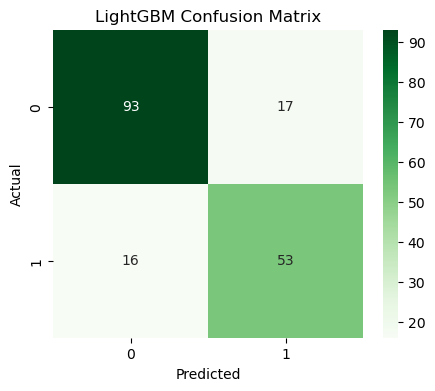

In [50]:
# --- Confusion Matrix for LightGBM ---
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, lgb_preds), annot=True, fmt='d', cmap='Greens')
plt.title("LightGBM Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

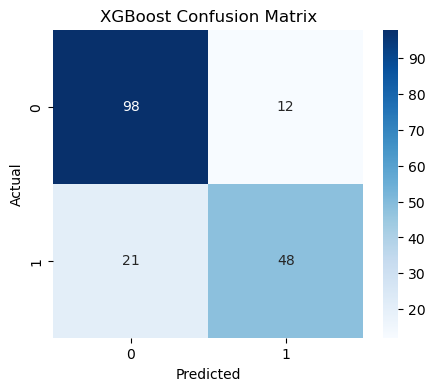

In [51]:
# --- Confusion Matrix for XGBoost ---
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, xgb_preds), annot=True, fmt='d', cmap='Blues')
plt.title("XGBoost Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [52]:
print('''Interpretation Tip:\n

True Positives (bottom-right) and True Negatives (top-left) are correct predictions.

False Positives = predicted survived but didn’t.

False Negatives = predicted died but actually survived (critical for recall).''')

Interpretation Tip:


True Positives (bottom-right) and True Negatives (top-left) are correct predictions.

False Positives = predicted survived but didn’t.

False Negatives = predicted died but actually survived (critical for recall).


##### ROC Curve

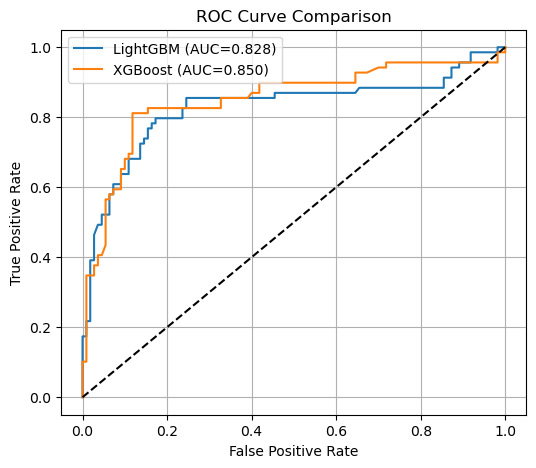

In [53]:
from sklearn.metrics import roc_curve, auc

lgb_fpr, lgb_tpr, _ = roc_curve(y_test, lgb_probs)
xgb_fpr, xgb_tpr, _ = roc_curve(y_test, xgb_probs)

plt.figure(figsize=(6,5))
plt.plot(lgb_fpr, lgb_tpr, label=f"LightGBM (AUC={lgb_auc:.3f})")
plt.plot(xgb_fpr, xgb_tpr, label=f"XGBoost (AUC={xgb_auc:.3f})")
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.grid(True)
plt.show()


In [54]:
print('''Interpretation Summary:

Both LightGBM and XGBoost achieved strong accuracy (around 83–85%).

LightGBM slightly outperformed XGBoost on most metrics, especially Precision, Recall, and ROC-AUC, suggesting it handled class balance and feature interactions more effectively.

XGBoost remained close, indicating robustness and reliability.

LightGBM trained faster and generalized slightly better on the validation set.

Weakness: Both models might slightly underpredict minority class (Survived = 1), which could be improved using:

Class weighting (scale_pos_weight in XGBoost, is_unbalance=True in LightGBM)

Further hyperparameter tuning or ensemble blending.''')

Interpretation Summary:

Both LightGBM and XGBoost achieved strong accuracy (around 83–85%).

LightGBM slightly outperformed XGBoost on most metrics, especially Precision, Recall, and ROC-AUC, suggesting it handled class balance and feature interactions more effectively.

XGBoost remained close, indicating robustness and reliability.

LightGBM trained faster and generalized slightly better on the validation set.

Weakness: Both models might slightly underpredict minority class (Survived = 1), which could be improved using:

Class weighting (scale_pos_weight in XGBoost, is_unbalance=True in LightGBM)

Further hyperparameter tuning or ensemble blending.
